# Partial Principal Components Analysis

In [1]:
# Chargement des librairies
import pandas as pd
import matplotlib.pyplot as plt
from scientisttools.decomposition import PartialPCA
from scientisttools.extractfactor import get_eig,get_ppca_ind,summaryPPCA
from scientisttools.pyplot import (
    plotPPCA,
    plot_eigenvalues,
    plot_correlation_circle,
    plot_cosines,
    plot_contrib)

In [2]:
# Chargement des données
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",index_col=0,sheet_name="DATA_ACP_ACTIF")
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada 1300
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CYL     18 non-null     int64
 1   PUISS   18 non-null     int64
 2   LONG    18 non-null     int64
 3   LARG    18 non-null     int64
 4   POIDS   18 non-null     int64
 5   VMAX    18 non-null     int64
dtypes: int64(6)
memory usage: 1008.0+ bytes


In [3]:
my_ppca = PartialPCA(n_components=None,
                     normalize=True,
                     row_labels=D.index,
                     col_labels=D.columns,
                     partial_labels=["CYL"],
                     graph=False,
                     figsize=None)
my_ppca.fit(D)

PartialPCA(col_labels=Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'VMAX'], dtype='object'),
           partial_labels=['CYL'],
           row_labels=Index(['Alfasud TI', 'Audi 100', 'Simca 1300', 'Citroen GS Club', 'Fiat 132',
       'Lancia Beta', 'Peugeot 504', 'Renault 16 TL', 'Renault 30',
       'Toyota Corolla', 'Alfetta 1.66', 'Princess 1800', 'Datsun 200L',
       'Taunus 2000', 'Rancho', 'Mazda 9295', 'Opel Rekord', 'Lada 1300'],
      dtype='object', name='Modele'))

#### Matrice des corrélations brutes

In [4]:
# Matrice des corrélations brutes
print(my_ppca.pearson_correlation_)

            CYL     PUISS      LONG      LARG     POIDS      VMAX
CYL    1.000000  0.796628  0.701462  0.629757  0.788952  0.664934
PUISS  0.796628  1.000000  0.641362  0.520832  0.765293  0.844379
LONG   0.701462  0.641362  1.000000  0.849266  0.868090  0.475928
LARG   0.629757  0.520832  0.849266  1.000000  0.716874  0.472945
POIDS  0.788952  0.765293  0.868090  0.716874  1.000000  0.477596
VMAX   0.664934  0.844379  0.475928  0.472945  0.477596  1.000000


In [5]:
print(my_ppca.partial_correlation_)

            CYL     PUISS      LONG      LARG     POIDS      VMAX
CYL    1.000000  0.107081 -0.059944  0.109058  0.320078  0.189489
PUISS  0.107081  1.000000 -0.083218 -0.334079  0.652087  0.841449
LONG  -0.059944 -0.083218  1.000000  0.581624  0.529678  0.090026
LARG   0.109058 -0.334079  0.581624  1.000000  0.126883  0.330532
POIDS  0.320078  0.652087  0.529678  0.126883  1.000000 -0.610662
VMAX   0.189489  0.841449  0.090026  0.330532 -0.610662  1.000000


In [6]:
# Matrice de corrélations brutes
print(my_ppca.R_)

          PUISS      LONG      LARG     POIDS      VMAX
PUISS  1.000000  0.641362  0.520832  0.765293  0.844379
LONG   0.641362  1.000000  0.849266  0.868090  0.475928
LARG   0.520832  0.849266  1.000000  0.716874  0.472945
POIDS  0.765293  0.868090  0.716874  1.000000  0.477596
VMAX   0.844379  0.475928  0.472945  0.477596  1.000000


In [7]:
print(my_ppca.resid_)

                     PUISS       LONG       LARG       POIDS       VMAX
Modele                                                                 
Alfasud TI        6.616050 -28.818832  -3.146005 -127.441146  12.802960
Audi 100          2.284461  36.310927  10.724111   43.784864   2.664916
Simca 1300       -1.952987   4.503578   4.355145   68.740969   1.011911
Citroen GS Club  -7.827464  -4.510467  -2.000521  -30.453454   1.566277
Fiat 132         15.414691   7.435341  -2.249042   39.651763   7.729682
Lancia Beta      11.916782   9.379163   5.328297   97.874070   8.947146
Peugeot 504     -12.744828   8.684833   0.862699   33.679864  -7.825474
Renault 16 TL   -26.717108  -6.735226  -3.070060  -49.568910 -16.838550
Renault 30       -1.424743 -24.312518  -2.905116  -57.142923  -0.564220
Toyota Corolla   -9.396502 -15.188057  -5.499371 -129.271339  -8.224772
Alfetta 1.66     27.065841  -2.942584  -4.114806   -1.013742  18.053508
Princess 1800    -9.831648   4.601890   3.844800   33.101931  -3

In [8]:
print(my_ppca.coef_)

               PUISS        LONG        LARG       POIDS        VMAX
intercept  13.780395  365.832168  152.064726  607.336582  123.052678
CYL         0.043410    0.041472    0.008949    0.288966    0.021588


In [9]:
print(my_ppca.normalized_coef_)

        PUISS      LONG      LARG     POIDS      VMAX
CYL  0.796628  0.701462  0.629757  0.788952  0.664934


In [10]:
print(my_ppca.rsquared_)

            PUISS      LONG      LARG     POIDS      VMAX
R carré  0.634616  0.492049  0.396594  0.622445  0.442137


In [11]:
print(my_ppca.rmse_)

          PUISS       LONG      LARG      POIDS      VMAX
RMSE  11.969832  15.312145  4.011337  81.783359  8.812198


In [12]:
# Matrice de corrélation partielle
print(my_ppca.resid_corr_)

          PUISS      LONG      LARG     POIDS      VMAX
PUISS  1.000000  0.191635  0.040784  0.368295  0.696984
LONG   0.191635  1.000000  0.736086  0.718547  0.017851
LARG   0.040784  0.736086  1.000000  0.460976  0.093415
POIDS  0.368295  0.718547  0.460976  1.000000 -0.102422
VMAX   0.696984  0.017851  0.093415 -0.102422  1.000000


In [13]:
# Eigenvalues
print(get_eig(my_ppca))

       eigenvalue  difference  proportion  cumulative
Dim.1    2.401058    0.787887   48.021166   48.021166
Dim.2    1.613171    0.914485   32.263420   80.284586
Dim.3    0.698686    0.515194   13.973729   94.258316
Dim.4    0.183493    0.079901    3.669851   97.928167
Dim.5    0.103592         NaN    2.071833  100.000000


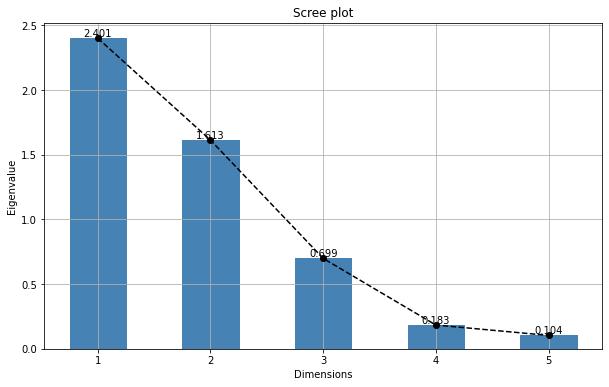

In [14]:
fig, axe = plt.subplots(figsize=(10,6))
plot_eigenvalues(my_ppca,choice="eigenvalue",add_labels=True,ax=axe)

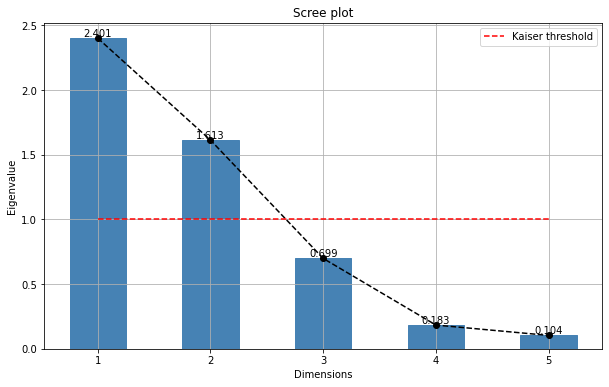

In [15]:
fig, axe = plt.subplots(figsize=(10,6))
plot_eigenvalues(my_ppca,choice="eigenvalue",add_labels=True,add_kaiser=True,ax=axe)

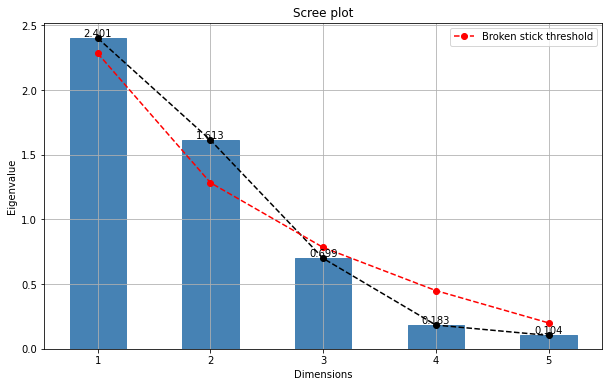

In [16]:
fig, axe = plt.subplots(figsize=(10,6))
plot_eigenvalues(my_ppca,choice="eigenvalue",add_labels=True,add_broken_stick=True,ax=axe)

In [17]:
print(my_ppca.eigen_vectors_)

[[-0.31326136  0.62974607 -0.34205162  0.18235421  0.595848  ]
 [-0.58263803 -0.21039099  0.08188603 -0.75614016  0.19446152]
 [-0.501658   -0.21362183  0.6150808   0.55032615  0.14670274]
 [-0.53469139 -0.14608189 -0.58308243  0.25107142 -0.53827801]
 [-0.15762171  0.70155635  0.39747435 -0.17059678 -0.54395309]]


In [18]:
print(pd.DataFrame(my_ppca.col_coord_[:,:2],index=my_ppca.col_labels_))

              0         1
PUISS -0.485409  0.799845
LONG  -0.902818 -0.267219
LARG  -0.777337 -0.271323
POIDS -0.828523 -0.185540
VMAX  -0.244240  0.891051


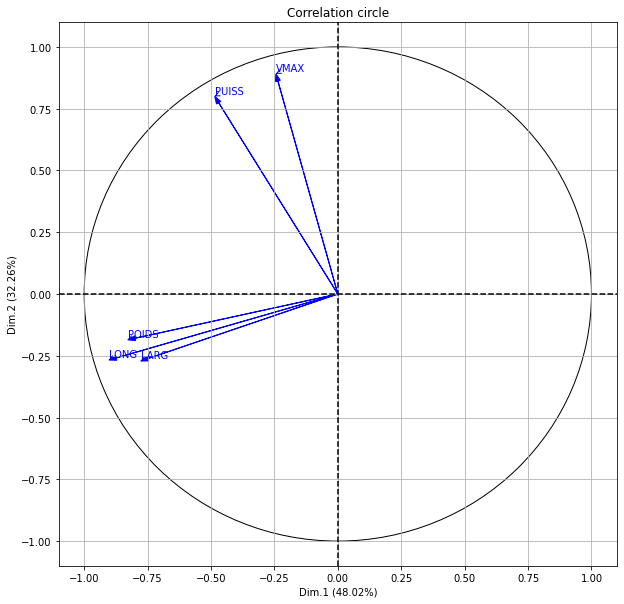

In [19]:
fig, axe = plt.subplots(figsize=(10,10))
plot_correlation_circle(my_ppca,repel=True,ax=axe,quanti_sup=False)

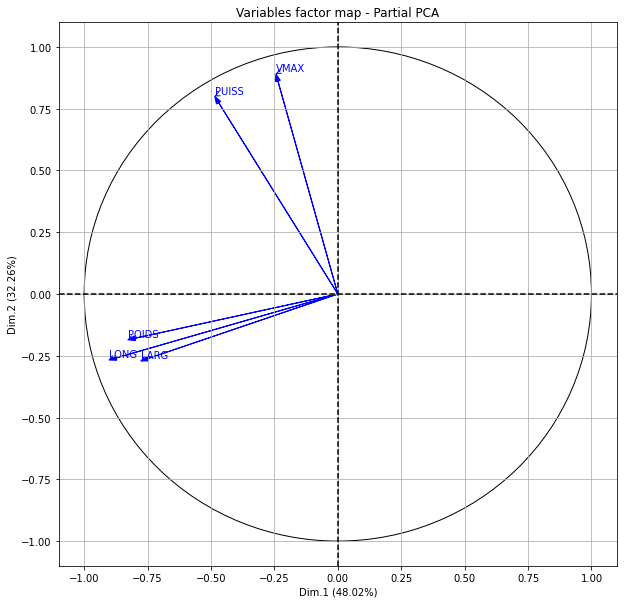

In [20]:
fig, axe = plt.subplots(figsize=(10,10))
plotPPCA(my_ppca,choice="var",repel=True,ax=axe)

In [21]:
print(pd.DataFrame(my_ppca.col_cos2_[:,:2],index=my_ppca.col_labels_))

              0         1
PUISS  0.235622  0.639752
LONG   0.815080  0.071406
LARG   0.604252  0.073616
POIDS  0.686450  0.034425
VMAX   0.059653  0.793973


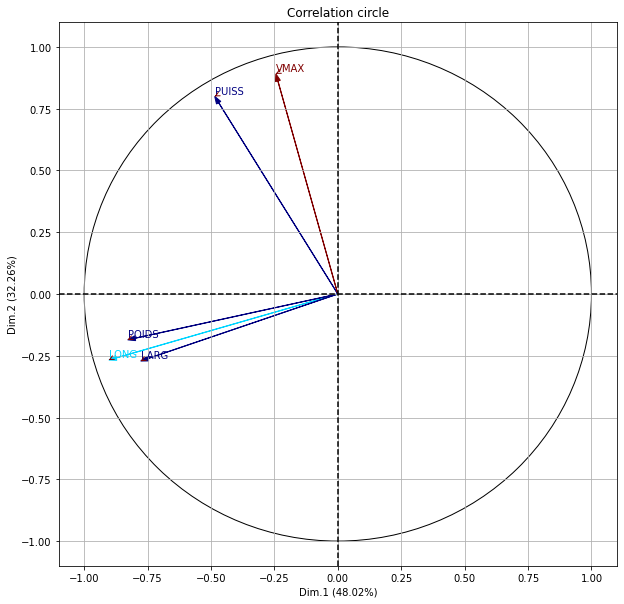

In [22]:
fig, axe = plt.subplots(figsize=(10,10))
plot_correlation_circle(my_ppca,color="cos2",repel=True,ax=axe,quanti_sup=False)

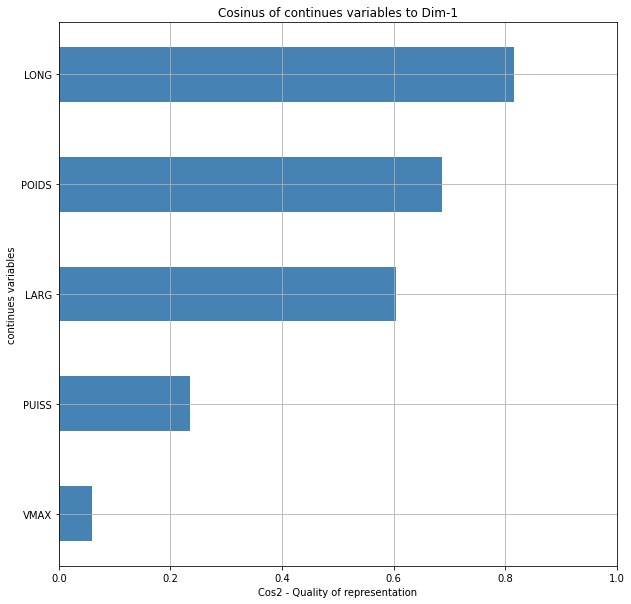

In [23]:
fig, axe =plt.subplots(figsize=(10,10))
plot_cosines(my_ppca,choice ="var",ax=axe)

In [24]:
print(pd.DataFrame(my_ppca.col_contrib_[:,:2],index=my_ppca.col_labels_))

               0          1
PUISS   9.813268  39.658011
LONG   33.946708   4.426437
LARG   25.166075   4.563429
POIDS  28.589489   2.133992
VMAX    2.484460  49.218131


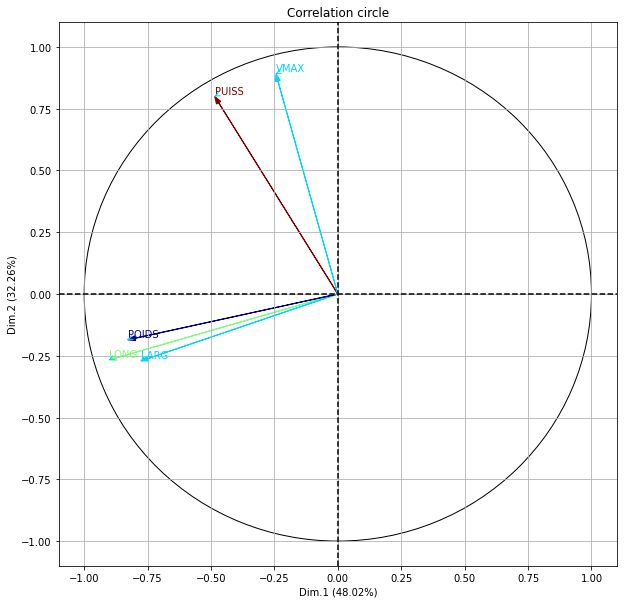

In [25]:
fig, axe = plt.subplots(figsize=(10,10))
plot_correlation_circle(my_ppca,color="contrib",repel=True,ax=axe,quanti_sup=False)

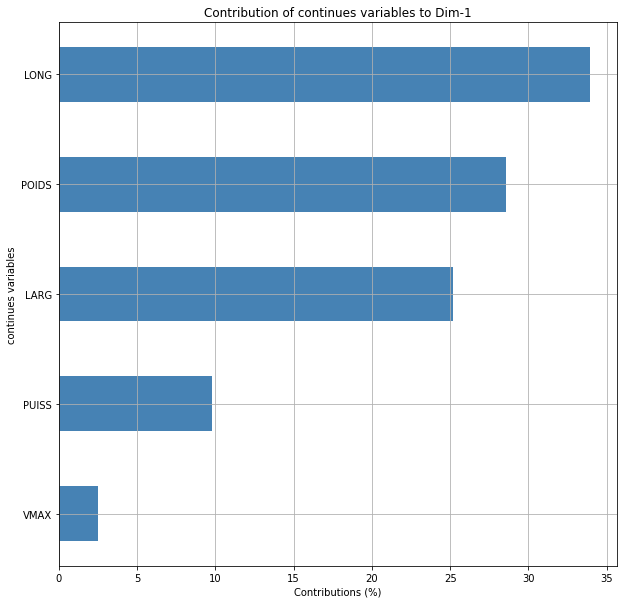

In [26]:
fig, axe =plt.subplots(figsize=(10,10))
plot_contrib(my_ppca,choice ="var",ax=axe)

In [27]:
print(pd.DataFrame(my_ppca.row_coord_[:,:2],index=D.index))

                        0         1
Modele                             
Alfasud TI       1.921062  2.158496
Audi 100        -3.116529 -0.815886
Simca 1300      -1.132429 -0.438785
Citroen GS Club  0.797750 -0.064210
Fiat 132        -0.802569  1.373142
Lancia Beta     -2.135040  0.751805
Peugeot 504     -0.185033 -1.518953
Renault 16 TL    1.964697 -2.401589
Renault 30       1.709396  0.470961
Toyota Corolla   2.503861 -0.416693
Alfetta 1.66    -0.398063  3.122613
Princess 1800   -0.545852 -1.152355
Datsun 200L     -2.134530 -0.290065
Taunus 2000      1.105128  0.275719
Rancho          -0.932033 -0.936248
Mazda 9295       0.616256  0.085885
Opel Rekord     -0.575817  0.373018
Lada 1300        1.339747 -0.576855


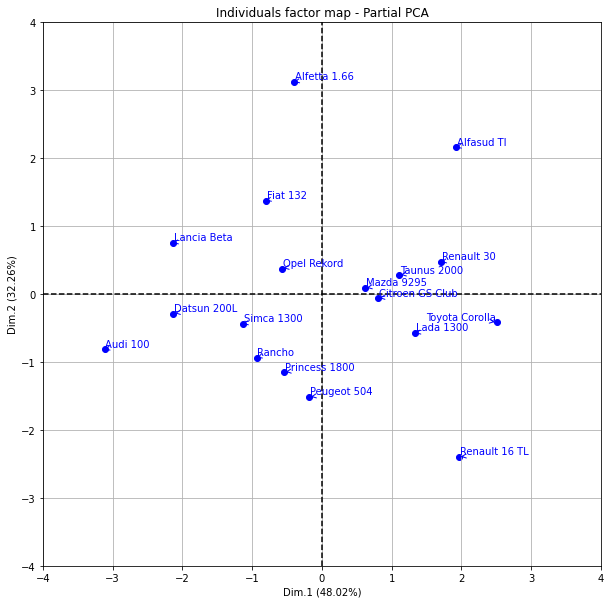

In [28]:
fig, axe = plt.subplots(figsize=(10,10))
plotPPCA(my_ppca,repel=True,ax=axe,xlim=(-4,4),ylim=(-4,4))

In [29]:
print(pd.DataFrame(my_ppca.row_cos2_[:,:2],index=D.index))

                        0         1
Modele                             
Alfasud TI       0.409966  0.517568
Audi 100         0.736635  0.050486
Simca 1300       0.637513  0.095713
Citroen GS Club  0.681838  0.004417
Fiat 132         0.200470  0.586834
Lancia Beta      0.814898  0.101042
Peugeot 504      0.013919  0.937961
Renault 16 TL    0.394694  0.589748
Renault 30       0.822632  0.062444
Toyota Corolla   0.915332  0.025351
Alfetta 1.66     0.015237  0.937624
Princess 1800    0.146041  0.650874
Datsun 200L      0.511591  0.009447
Taunus 2000      0.578541  0.036012
Rancho           0.266200  0.268613
Mazda 9295       0.319508  0.006206
Opel Rekord      0.140012  0.058756
Lada 1300        0.571001  0.105858


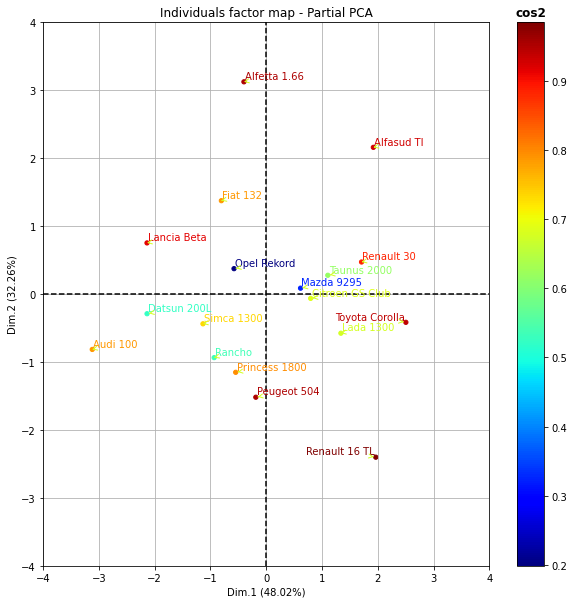

In [30]:
fig, axe = plt.subplots(figsize=(10,10))
plotPPCA(my_ppca,color="cos2",repel=True,ax=axe,xlim=(-4,4),ylim=(-4,4))

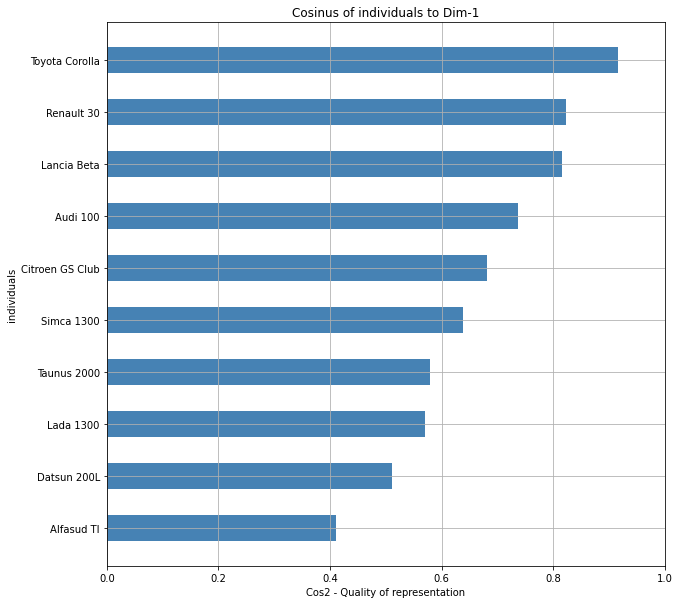

In [31]:
fig, axe =plt.subplots(figsize=(10,10))
plot_cosines(my_ppca,choice ="ind",ax=axe)

In [32]:
print(pd.DataFrame(my_ppca.row_contrib_[:,:2],index=D.index))

                         0          1
Modele                               
Alfasud TI        8.539015  16.045367
Audi 100         22.473309   2.292483
Simca 1300        2.967199   0.663057
Citroen GS Club   1.472509   0.014199
Fiat 132          1.490356   6.493485
Lancia Beta      10.547194   1.946512
Peugeot 504       0.079218   7.945769
Renault 16 TL     8.931324  19.862977
Renault 30        6.760989   0.763866
Toyota Corolla   14.505913   0.597970
Alfetta 1.66      0.366631  33.580213
Princess 1800     0.689406   4.573196
Datsun 200L      10.542154   0.289760
Taunus 2000       2.825854   0.261806
Rancho            2.009960   3.018761
Mazda 9295        0.878712   0.025403
Opel Rekord       0.767174   0.479189
Lada 1300         4.153083   1.145987


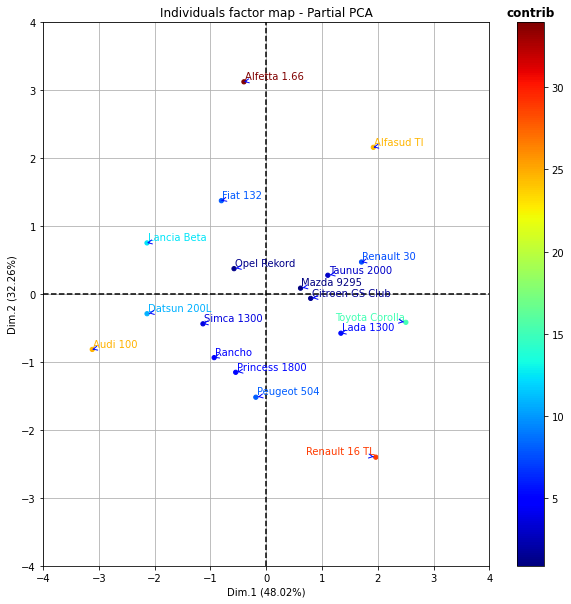

In [33]:
fig, axe = plt.subplots(figsize=(10,10))
plotPPCA(my_ppca,color="contrib",repel=True,ax=axe,xlim=(-4,4),ylim=(-4,4))

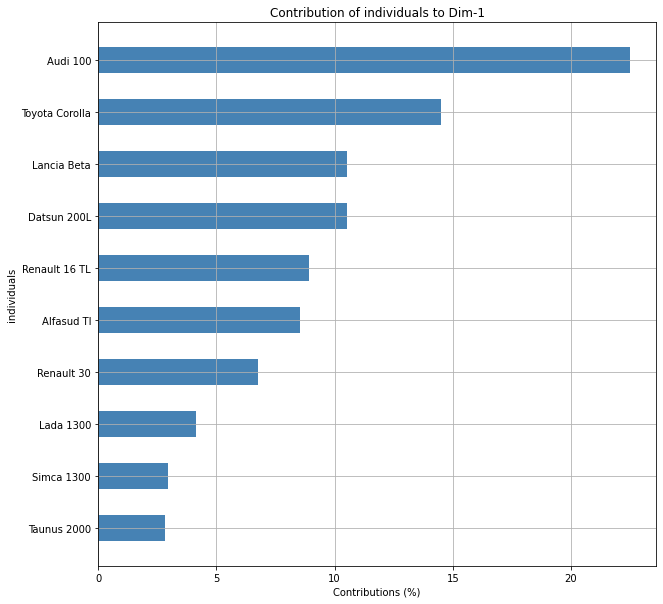

In [34]:
fig, axe =plt.subplots(figsize=(10,10))
plot_contrib(my_ppca,choice ="ind",ax=axe)

In [35]:
row = get_ppca_ind(my_ppca)
row.keys()

dict_keys(['coord', 'cos2', 'contrib', 'infos'])

In [36]:
row_coord = row["coord"]
display(row_coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Modele,,,,,
Alfasud TI,1.921062,2.158496,0.660509,0.453213,-0.103214
Audi 100,-3.116529,-0.815886,1.581323,-0.204197,0.514384
Simca 1300,-1.132429,-0.438785,0.303239,0.536789,-0.395646
Citroen GS Club,0.797750,-0.064210,0.180575,-0.294782,-0.416335
Fiat 132,-0.802569,1.373142,-0.679642,-0.468798,0.041395
Lancia Beta,-2.135040,0.751805,0.232398,0.576650,-0.289279
Peugeot 504,-0.185033,-1.518953,-0.050167,-0.249787,-0.231207
Renault 16 TL,1.964697,-2.401589,-0.149393,-0.321808,-0.162121
Renault 30,1.709396,0.470961,-0.152805,0.615825,-0.075005


In [37]:
row_cos2 = row["cos2"]
display(row_cos2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Modele,,,,,
Alfasud TI,0.409966,0.517568,0.048464,0.022818,0.001183
Audi 100,0.736635,0.050486,0.189649,0.003162,0.020067
Simca 1300,0.637513,0.095713,0.045713,0.143243,0.077818
Citroen GS Club,0.681838,0.004417,0.034935,0.093100,0.185709
Fiat 132,0.200470,0.586834,0.143762,0.068400,0.000533
Lancia Beta,0.814898,0.101042,0.009655,0.059445,0.014960
Peugeot 504,0.013919,0.937961,0.001023,0.025365,0.021732
Renault 16 TL,0.394694,0.589748,0.002282,0.010589,0.002687
Renault 30,0.822632,0.062444,0.006574,0.106766,0.001584


In [38]:
row_contrib = row["contrib"]
display(row_contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Modele,,,,,
Alfasud TI,8.539015,16.045367,3.468988,6.218914,0.571322
Audi 100,22.473309,2.292483,19.883191,1.262430,14.189847
Simca 1300,2.967199,0.663057,0.731163,8.724009,8.394900
Citroen GS Club,1.472509,0.014199,0.259273,2.630943,9.295820
Fiat 132,1.490356,6.493485,3.672867,6.653972,0.091897
Lancia Beta,10.547194,1.946512,0.429448,10.067786,4.487818
Peugeot 504,0.079218,7.945769,0.020012,1.889067,2.866860
Renault 16 TL,8.931324,19.862977,0.177462,3.135477,1.409551
Renault 30,6.760989,0.763866,0.185662,11.482148,0.301703


In [39]:
row_infos = row["infos"]
display(row_infos)

,"d(i,G)",p(i),"I(i,G)"
Modele,,,
Alfasud TI,3.000319,0.055556,0.500106
Audi 100,3.631155,0.055556,0.732516
Simca 1300,1.418294,0.055556,0.111753
Citroen GS Club,0.966108,0.055556,0.051854
Fiat 132,1.792494,0.055556,0.178502
Lancia Beta,2.365127,0.055556,0.310768
Peugeot 504,1.568382,0.055556,0.136657
Renault 16 TL,3.127271,0.055556,0.543324
Renault 30,1.884690,0.055556,0.197336


In [40]:
summaryPPCA(my_ppca)

                     Partial Principal Component Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3   Dim.4    Dim.5
Variance                  2.401   1.613   0.699   0.183    0.104
Difference                0.788   0.914   0.515   0.080      NaN
% of var.                48.021  32.263  13.974   3.670    2.072
Cumulative of % of var.  48.021  80.285  94.258  97.928  100.000

Individuals (the 10 first)

                 d(i,G)   p(i)  I(i,G)  Dim.1     ctr   cos2  Dim.2     ctr  \
Modele                                                                        
Alfasud TI        3.000  0.056   0.500  1.921   8.539  0.410  2.158  16.045   
Audi 100          3.631  0.056   0.733 -3.117  22.473  0.737 -0.816   2.292   
Simca 1300        1.418  0.056   0.112 -1.132   2.967  0.638 -0.439   0.663   
Citroen GS Club   0.966  0.056   0.052  0.798   1.473  0.682 -0.064   0.014   
Fiat 132          1.792  0.056   0.179 -0.803   1.490  0.

In [41]:
summaryPPCA(my_ppca,to_markdown=True)

                     Partial Principal Component Analysis - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |   Dim.4 |   Dim.5 |
|:------------------------|--------:|--------:|--------:|--------:|--------:|
| Variance                |   2.401 |   1.613 |   0.699 |   0.183 |   0.104 |
| Difference              |   0.788 |   0.914 |   0.515 |   0.08  | nan     |
| % of var.               |  48.021 |  32.263 |  13.974 |   3.67  |   2.072 |
| Cumulative of % of var. |  48.021 |  80.285 |  94.258 |  97.928 | 100     |

Individuals (the 10 first)

| Modele          |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |    ctr |   cos2 |   Dim.2 |    ctr |   cos2 |   Dim.3 |    ctr |   cos2 |
|:----------------|---------:|-------:|---------:|--------:|-------:|-------:|--------:|-------:|-------:|--------:|-------:|-------:|
| Alfasud TI      |    3     |  0.056 |    0.5   |   1.921 |  8.539 |  0.41  |   2.158 | 16.045 |  0.518 |   0.661 |  